In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("F:\\mldata\\train_ctrUa4K.csv")

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [63]:
len(df.Loan_Amount_Term.unique())

10

In [74]:
sorted(df.Loan_Amount_Term.unique())

[12, 36, 60, 84, 120, 180, 240, 300, 360, 480]

In [76]:
sorted(df6.Loan_Amount_Term.unique())

[12.0, 36.0, 60.0, 84.0, 120.0, 180.0, 240.0, 300.0, 360.0, 480.0]

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
import seaborn as sns

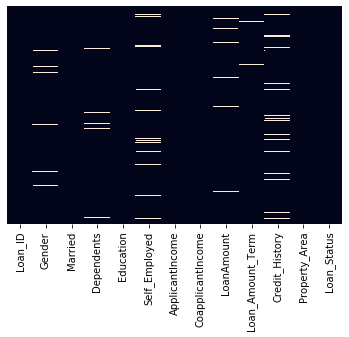

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [8]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [9]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [10]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [11]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [12]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [13]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [14]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [15]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [17]:
for features in df.columns: 
    print(features   ,  df[features].dtypes)

Loan_ID object
Gender object
Married object
Dependents object
Education object
Self_Employed object
ApplicantIncome int64
CoapplicantIncome float64
LoanAmount float64
Loan_Amount_Term float64
Credit_History float64
Property_Area object
Loan_Status object


In [18]:
type('LoanAmount')

str

In [19]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
df1=df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [21]:
df.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount'],axis=1,inplace=True)

In [22]:
#df[df['Dependents']>2]

In [23]:
def is_int(x):
    try:
        int(x)
    except:
        return False
    return True

In [24]:
df["Loan_Amount_Term"]= df["Loan_Amount_Term"].astype(int) 

In [25]:
df['Loan_Amount_Term'].dtypes

dtype('int32')

In [26]:
df4 = pd.get_dummies(df, columns=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'], drop_first=True)

In [27]:
#df3 = pd.get_dummies(df,drop_first=True)


In [28]:
df4

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Loan_Amount_Term_36,Loan_Amount_Term_60,Loan_Amount_Term_84,Loan_Amount_Term_120,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_360,Loan_Amount_Term_480,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1
3,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
610,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
611,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1
612,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1


In [29]:
#df2 = pd.get_dummies(df['Loan_Amount_Term'])

In [30]:
df5=pd.concat([df1,df4],axis='columns')

In [31]:
df5

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,...,Loan_Amount_Term_120,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_360,Loan_Amount_Term_480,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
1,4583,1508.0,128.000000,1,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,3000,0.0,66.000000,1,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,1
3,2583,2358.0,120.000000,1,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,1
4,6000,0.0,141.000000,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
610,4106,0.0,40.000000,1,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
611,8072,240.0,253.000000,1,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
612,7583,0.0,187.000000,1,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,1


In [55]:
df5.shape

(614, 23)

In [32]:
y=df4['Loan_Status_Y']

In [33]:
X=df4.drop('Loan_Status_Y',axis='columns')

In [54]:
X.shape

(614, 19)

In [34]:
df6=pd.read_csv("F:\\mldata\\test_lAUu6dG.csv")

In [51]:
df6.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [58]:
df6['Loan_Amount_Term'].unique()

array([360., 240., 180.,  60., 480.,  84.,  12., 300., 350.,  36., 120.,
         6.])

In [59]:
df6['Loan_Amount_Term'].value_counts()

360.0    317
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

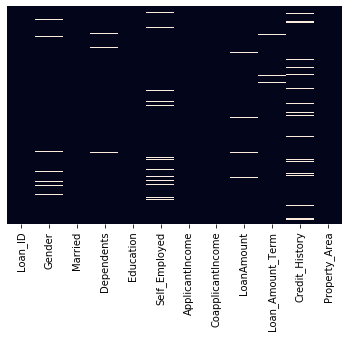

In [35]:
sns.heatmap(df6.isnull(),yticklabels=False,cbar=False)

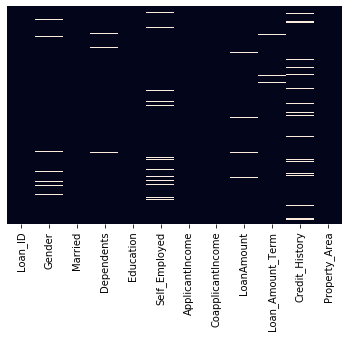

In [36]:
sns.heatmap(df6.isnull(),yticklabels=False,cbar=False)

In [37]:
df6.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [38]:
df6['LoanAmount']=df6['LoanAmount'].fillna(df6['LoanAmount'].mean())

df6['Gender']=df6['Gender'].fillna(df6['Gender'].mode()[0])

df6['Self_Employed']=df6['Self_Employed'].fillna(df6['Self_Employed'].mode()[0])

df6['Loan_Amount_Term']=df6['Loan_Amount_Term'].fillna(df6['Loan_Amount_Term'].mode()[0])

df6['Credit_History']=df6['Credit_History'].fillna(df6['Credit_History'].mode()[0])

df6['Dependents']=df6['Dependents'].fillna(df6['Dependents'].mode()[0])

In [39]:
df7=df6[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

df6.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount'],axis=1,inplace=True)

In [40]:
df6

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,360.0,1.0,Urban
364,Male,No,0,Graduate,No,360.0,1.0,Semiurban
365,Male,Yes,0,Graduate,No,360.0,1.0,Rural


In [60]:
df6 = df6[df6.Loan_Amount_Term != 350.0]


In [75]:
df6 = df6[df6.Loan_Amount_Term != 6.0]


In [ ]:
#df6[(df6.Loan_Amount_Term != 6.0) & (df6.Loan_Amount_Term != 10)]


In [62]:
len(df6.Loan_Amount_Term.unique())

11

In [77]:
df8 = pd.get_dummies(df6, columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area'], drop_first=True)

In [78]:
df8.shape

(365, 19)

In [79]:
df9=pd.concat([df7,df8],axis='columns')

In [80]:
df9

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,...,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,3076,1500,126.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,5000,1800,208.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,2340,2546,100.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,3276,0,78.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
363,4158,709,115.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
364,3250,1993,126.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
365,5000,2393,158.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [81]:
X_1=df9.iloc[0:,]

In [82]:
X_1.shape

(367, 22)

In [84]:
X.shape

(614, 19)

In [83]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr=LogisticRegression()

In [48]:
lr.fit(X,y)

C:\Users\dell\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
lr.score(X,y)

0.8078175895765473

In [50]:
y_prd=lr.predict(X_1)

ValueError: X has 24 features per sample; expecting 19

In [89]:
for x in df.columns:
    print(x ,len(df['x'].unique()))

KeyError: 'x'